# Advanced Regression Assignment

## Table Of Contents

- [Problem Statement](#problem-statement)
- [Business Goal](#business-goal)
- [Steps Involved](#steps-involved)
- [Reading and Understanding the Data](#reading-and-understanding-data)
  - [Data Dictionary](#data-dictionary)
  - [Import All the required libraries](#import-all-the-required-librarires-classes-and-methods)

## Problem Statement

>A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

>The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

*Note: Also, determine the optimal value of lambda for ridge and lasso regression.*

## Business Goal

>You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Steps Involved

- Reading, Understanding and visualizing the data.
- Preparing the data for modelling(train-test split, rescaling etc.)
- Training the model.
- Verifying the model on the train set.
- Predictions and analysis on the test set.

## Reading And Understanding Data

### Data Dictionary

In [35]:
data_description = open('./Data/data_description.txt', 'r')
print(data_description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

#### Import all the required librarires, classes and methods.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
import sweetviz as sv

#### Suppress Library Warnings

In [37]:
import warnings

warnings.filterwarnings('ignore')

#### Read dataset and understand kind of data it's storing

In [38]:
housing_train = pd.read_csv('./Data/train.csv')
housing_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
housing_train.shape

(1460, 81)

**Total Records: 1460**
**Cell Per Record: 81**

In [40]:
housing_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Mean, Median, Min, Max, 25 and 75 percntile description of the dataset(Column Wise)**

In [41]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Univariate Analysis

In [42]:
def boxplot_and_describe(column_name):
    """ plots a box plot for the provided column
        prints a description of the column
    """
    plt.figure()
    sns.boxplot(data = housing_train, y = column_name)
    plt.show()
    print(housing_train[column_name].describe())

##### LotFrontage: Linear feet of street connected to property

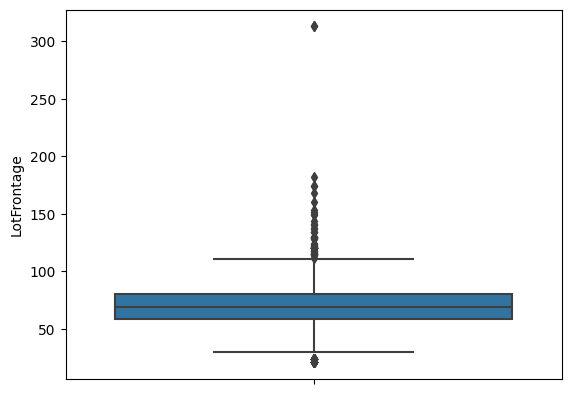

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [43]:
boxplot_and_describe('LotFrontage')

*From the above boxplot we can cleary see that there are some outliers present in the LotFrontage column.*

In [44]:
def remove_outliers(column_name):
    """ Removes outliers on the basis of a column
        Uses max value = mean + 3 * sigma and min value = mean - 3 * sigma

        keyword arguements:
        column_name -- name of the column which has the outliers.

        returns new dataset with outliers removed on the basis of the column mentioned.
    """
    mean = housing_train[column_name].mean()
    sd =  housing_train[column_name].std()
    max_value = mean + (sd * 3);
    min_value = mean - (sd * 3);
    initial_shape = housing_train.shape
    new_housing_train = housing_train.loc[(housing_train[column_name] <= max_value) & (housing_train[column_name] >= min_value)]
    new_shape = new_housing_train.shape
    print('Removed Outliers:', initial_shape[0] - new_shape[0])
    return new_housing_train
    

In [48]:
housing_train = remove_outliers('LotFrontage')

Removed Outliers: 271


**Total Outliers Removed: 271**

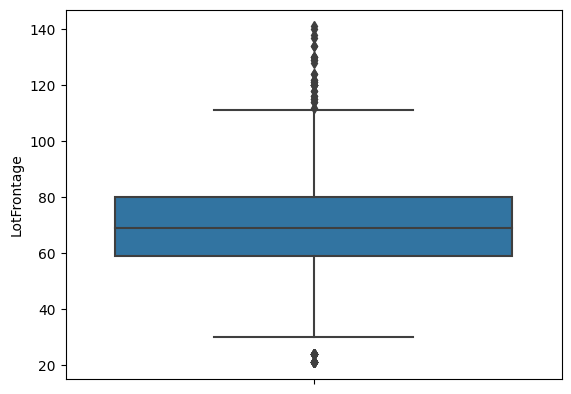

count    1189.000000
mean       68.879731
std        20.607397
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       141.000000
Name: LotFrontage, dtype: float64


In [49]:
boxplot_and_describe('LotFrontage')

##### LotArea: Lot size in square feet

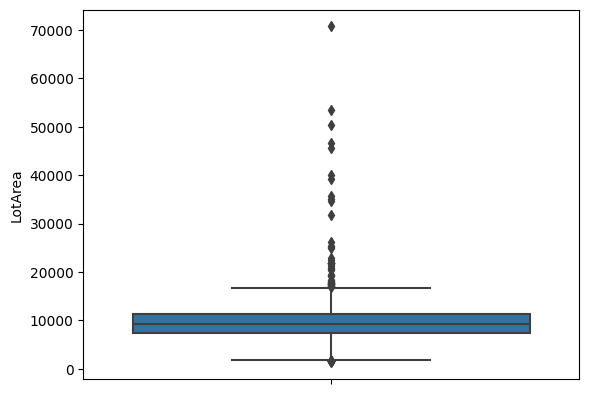

count     1189.000000
mean      9672.812447
std       4959.539585
min       1300.000000
25%       7407.000000
50%       9245.000000
75%      11200.000000
max      70761.000000
Name: LotArea, dtype: float64


In [50]:
boxplot_and_describe('LotArea')

In [51]:
housing_train = remove_outliers('LotArea')

Removed Outliers: 15


**Total Outliers Removed: 15**

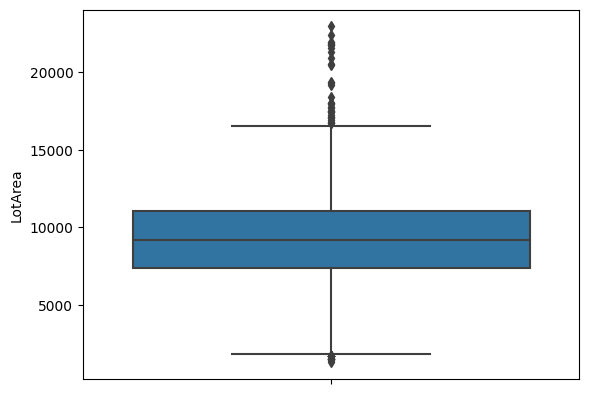

count     1174.000000
mean      9298.278535
std       3439.943932
min       1300.000000
25%       7359.500000
50%       9191.500000
75%      11073.750000
max      22950.000000
Name: LotArea, dtype: float64


In [52]:
boxplot_and_describe('LotArea')

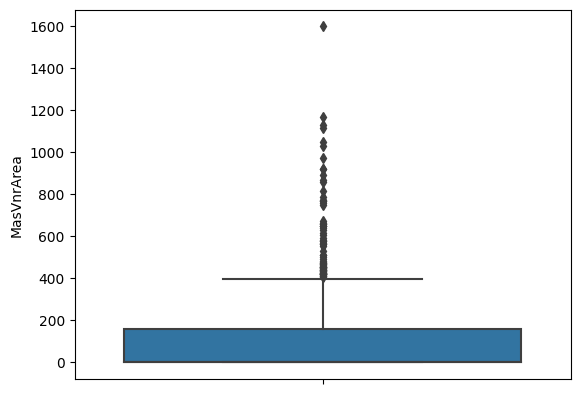

count    1168.000000
mean      100.622432
std       179.644432
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [53]:
boxplot_and_describe('MasVnrArea')

In [54]:
housing_train = remove_outliers('MasVnrArea')

Removed Outliers: 33


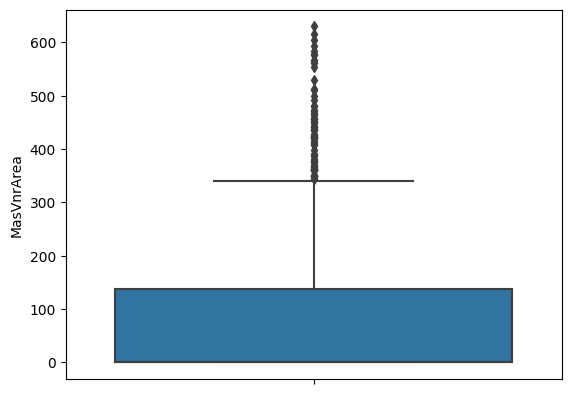

count    1141.000000
mean       82.670465
std       134.094906
min         0.000000
25%         0.000000
50%         0.000000
75%       137.000000
max       630.000000
Name: MasVnrArea, dtype: float64


In [55]:
boxplot_and_describe('MasVnrArea')

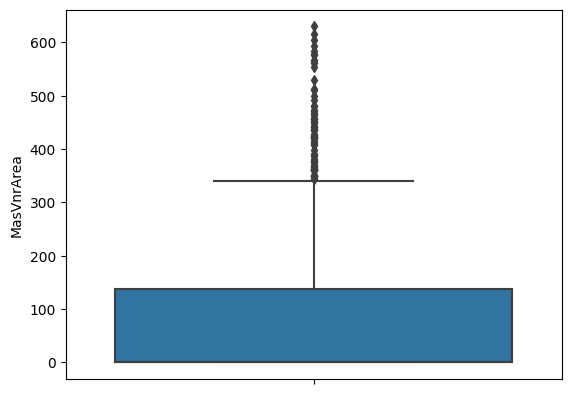

count    1141.000000
mean       82.670465
std       134.094906
min         0.000000
25%         0.000000
50%         0.000000
75%       137.000000
max       630.000000
Name: MasVnrArea, dtype: float64


In [56]:
boxplot_and_describe('MasVnrArea')

In [57]:
housing_train = remove_outliers('MasVnrArea')

Removed Outliers: 16


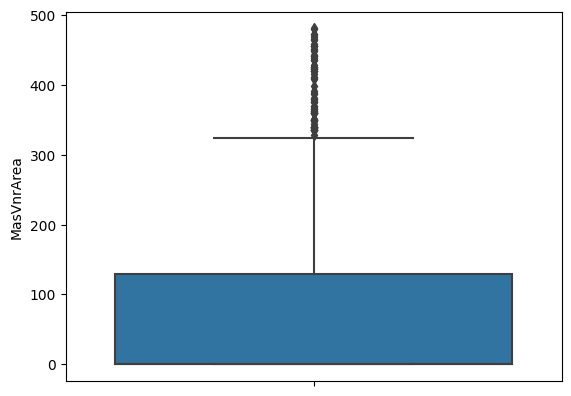

count    1125.000000
mean       75.869333
std       122.116390
min         0.000000
25%         0.000000
50%         0.000000
75%       130.000000
max       481.000000
Name: MasVnrArea, dtype: float64


In [58]:
boxplot_and_describe('MasVnrArea')

#### Pool Area - Pool area in square feet

**Seems like there are only three houses with pools and most of the houses doesn't have any pool**

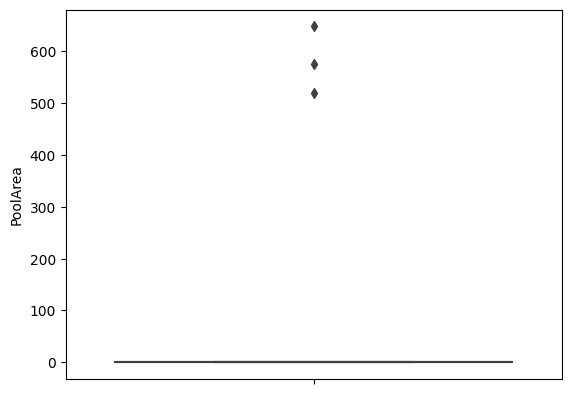

count    1125.000000
mean        1.549333
std        30.099782
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       648.000000
Name: PoolArea, dtype: float64


In [59]:
boxplot_and_describe('PoolArea')

In [60]:
housing_train = remove_outliers('PoolArea')

Removed Outliers: 3


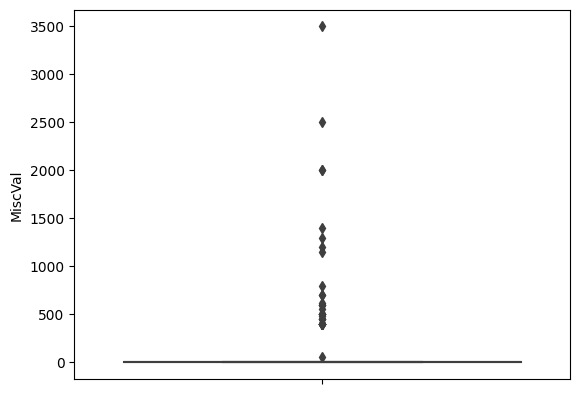

count    1122.000000
mean       25.502674
std       187.170067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3500.000000
Name: MiscVal, dtype: float64


In [61]:
boxplot_and_describe('MiscVal')

In [62]:
housing_train = remove_outliers('MiscVal')

Removed Outliers: 15


In [63]:
housing_train['MiscVal'].value_counts()

MiscVal
0      1086
400      10
500       5
450       3
480       1
54        1
560       1
Name: count, dtype: int64

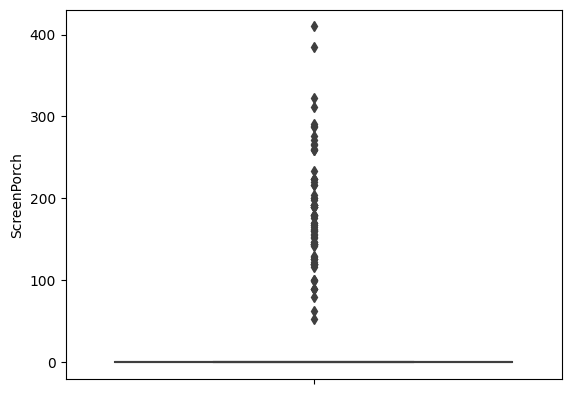

count    1107.000000
mean       13.204155
std        50.471142
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       410.000000
Name: ScreenPorch, dtype: float64


In [64]:
boxplot_and_describe('ScreenPorch')

In [65]:
housing_train = remove_outliers('ScreenPorch')

Removed Outliers: 44


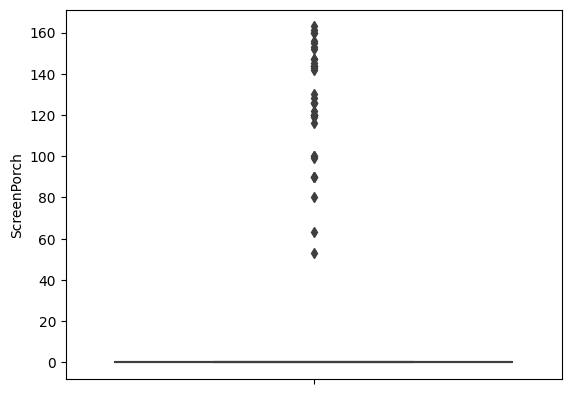

count    1063.000000
mean        4.378175
std        23.640910
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       163.000000
Name: ScreenPorch, dtype: float64


In [66]:
boxplot_and_describe('ScreenPorch')

In [ ]:
housing_train_numeric = housing_train[['SalePrice', 'MiscVal', 'PoolArea', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'MasVnrArea', 'LotArea', 'LotFrontage']]